## Stable Diffusion

   Stable Diffusion is a generative artificial intelligence (generative AI) model that produces unique photorealistic images from text and image prompts. It originally launched in 2022. Besides images, you can also use the model to create videos and animations.

In [12]:
%nvidia-smi # to check the GPU of the machine

Sun Feb  2 11:09:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             31W /   70W |    3984MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Installation
*   [cuda](https://developer.nvidia.com/cuda-toolkit) - a proprietary parallel computing platform and application programming interface (API) that allows software to use certain types of graphics processing units (GPUs) for accelerated general-purpose processing, an approach called general-purpose computing on GPUs.
*   [xformers](https://facebookresearch.github.io/xformers/components/ops.html) - memory optimization since we have limited memory in the VM
*   [diffusers](https://huggingface.co/docs/diffusers/en/index) - go-to library for state-of-the-art pretrained diffusion models for generating images, audio, and even 3D structures of molecules.
*   [torch](https://pytorch.org/) - A Tensor library like NumPy, with strong GPU support


In [13]:
%pip install --upgrade "jax[cuda]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
%pip install diffusers flax jaxlib
%pip install --pre -U xformers
%pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors huggingface-hub
%pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
Looking in indexes: https://download.pytorch.org/whl/cu118


#### Check if CUDA version is compatible

In [2]:
import os
import torch
os.environ['CUDA_VISIBLE_DEVICES'] = '0' #If you have multiple gpus try setting it to 0,1,...
print(f"Is CUDA available: {torch.cuda.is_available()}")

Is CUDA available: True


#### Pipeline for image Generation
*   We can define with little effort a pipeline to use the Stable Diffusion model, through the [StableDiffusionPipeline](https://huggingface.co/docs/diffusers/en/api/pipelines/stable_diffusion/overview)


In [3]:
import torch 
from diffusers import StableDiffusionPipeline

In [4]:
pipeLine = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",torch_dtype=torch.float16) #load the model
pipeLine = pipeLine.to("cuda")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#### Optimizations - reduce memory usage

In [5]:
pipeLine.enable_attention_slicing()
pipeLine.enable_xformers_memory_efficient_attention()

#### Create a Prompt

In [6]:
prompt = 'a smartphone'

#### Generating the Image

In [14]:
img = pipeLine(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

#### Result

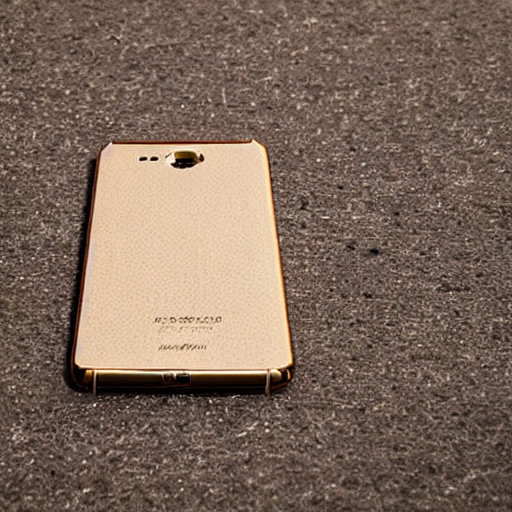

In [15]:
img